# Stackoverflow in 2018

In this notebook we will see trends on StackOverflow in 2018, i.e. how many questions and answers were created in 2018, most popular tags etc.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
%matplotlib inline

colormap = 'YlOrRd'
plt.style.use('seaborn-notebook')

## Total number of questions and answers in 2018

Query: https://data.stackexchange.com/stackoverflow/query/966666/questions-and-answers-per-year

In [3]:
result = pd.read_csv('https://data.stackexchange.com/stackoverflow/csv/1198374')
result.head()

,questionCount,answerCount
0,2229153,2593565


There were 2229153 questions and 2593565 answers created on Stackoverflow in 2018. On average, each question has __1,163__ answers.

## Questions in 2018 with most upvotes and views

Let's see top 10 questions in 2018 with best scores.

Query: https://data.stackexchange.com/stackoverflow/query/966684/most-popular-questions-in-a-year

In [27]:
best_score_results = pd.read_csv('https://data.stackexchange.com/stackoverflow/csv/1199102')
best_score_results.head(10)

,Id,Title,Tags,Score
0,48270127,Can (a== 1 && a ==2 && a==3) ever evaluate to ...,<javascript><ecmascript-6>,2314
1,53452713,Why is 2 * (i * i) faster than 2 * i * i in Java?,<java><performance><benchmarking><bytecode><jit>,761
2,50683786,"Why does array[idx++]+=""a"" increase idx once i...",<java><java-8><javac><java-9><java-10>,686
3,52390368,Array state will be cached in iOS 12 Safari. I...,<javascript><ios><safari><ios12>,430
4,50718018,Xcode 10 Error: Multiple commands produce,<info.plist><xcode10>,319
5,49990933,Configuration on demand is not supported by th...,<android><android-studio>,292
6,52264638,Is main a valid Java identifier?,<java><language-lawyer><main><identifier>,275
7,48709870,Still getting warning : Configuration 'compile...,<android><gradle><build>,272
8,49194719,Authentication plugin 'caching_sha2_password' ...,<mysql><database><mysql-workbench><mysql-8.0>,239
9,52522565,Git is not working after macOS Mojave Update (...,<xcode><git><macos><command-line><terminal>,227


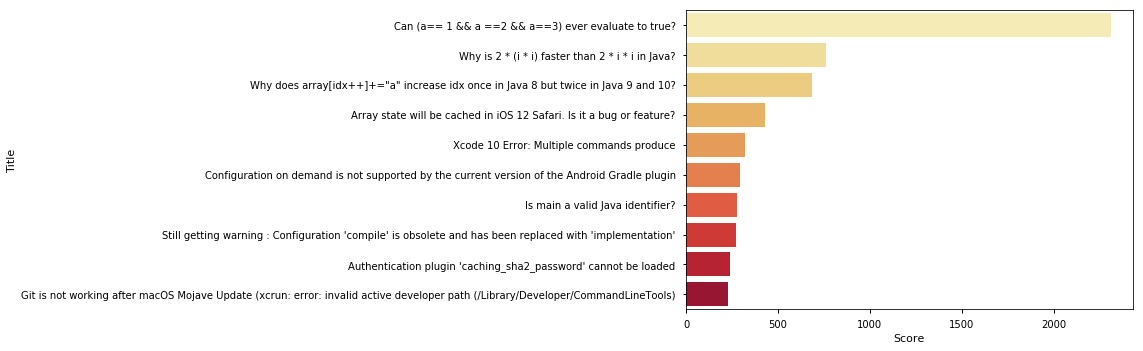

In [33]:
sns.barplot(data=best_score_results, x='Score', y='Title', palette=colormap)

Questions with biggest number of views.

Query: https://data.stackexchange.com/stackoverflow/query/966697/questions-with-biggest-number-of-views-in-a-year

In [34]:
biggest_view_questions = pd.read_csv('https://data.stackexchange.com/stackoverflow/csv/1198421')
biggest_view_questions.head(10)

,Id,Title,Tags,ViewCount
0,48270127,Can (a== 1 && a ==2 && a==3) ever evaluate to ...,<javascript><ecmascript-6>,348262
1,49194719,Authentication plugin 'caching_sha2_password' ...,<mysql><database><mysql-workbench><mysql-8.0>,273752
2,48248832,Stylesheet not loaded because of MIME-type,<html><css><gulp><mime-types><browser-sync>,261332
3,49810580,Error: Local workspace file ('angular.json') c...,<angular-cli><travis-ci><package-lock.json>,210996
4,53452713,Why is 2 * (i * i) faster than 2 * i * i in Java?,<java><performance><benchmarking><bytecode><jit>,208736
5,49836676,Error after upgrading pip: cannot import name ...,<python><pip>,157351
6,48468144,How to view instagram profile picture in full-...,<instagram><profile-picture>,151256
7,50977913,"Google Maps shows ""For development purposes only""",<google-maps><google-maps-api-3>,137736
8,48709870,Still getting warning : Configuration 'compile...,<android><gradle><build>,134408
9,50718018,Xcode 10 Error: Multiple commands produce,<info.plist><xcode10>,117971


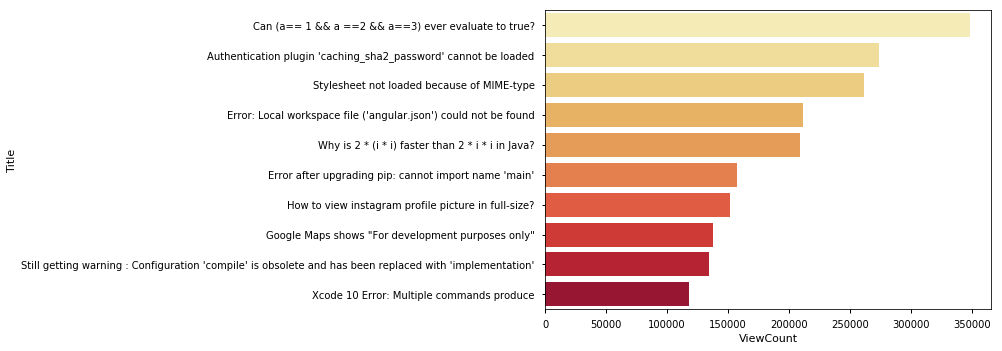

In [35]:
sns.barplot(data=biggest_view_questions, x='ViewCount', y='Title', palette=colormap)

## Daily activity in 2018

In this section we will try to see how many questions and answers were created on each day of 2018.

Query: https://data.stackexchange.com/stackoverflow/query/966732/questions-and-answers-per-day

In [8]:
daily_activity = pd.read_csv('https://data.stackexchange.com/stackoverflow/csv/1198453')
daily_activity.head()

,creationDay,creationMonth,isAnswer,cnt
0,1,1,0,3425
1,1,2,1,7566
2,1,3,0,8696
3,1,5,1,5942
4,1,6,0,7878


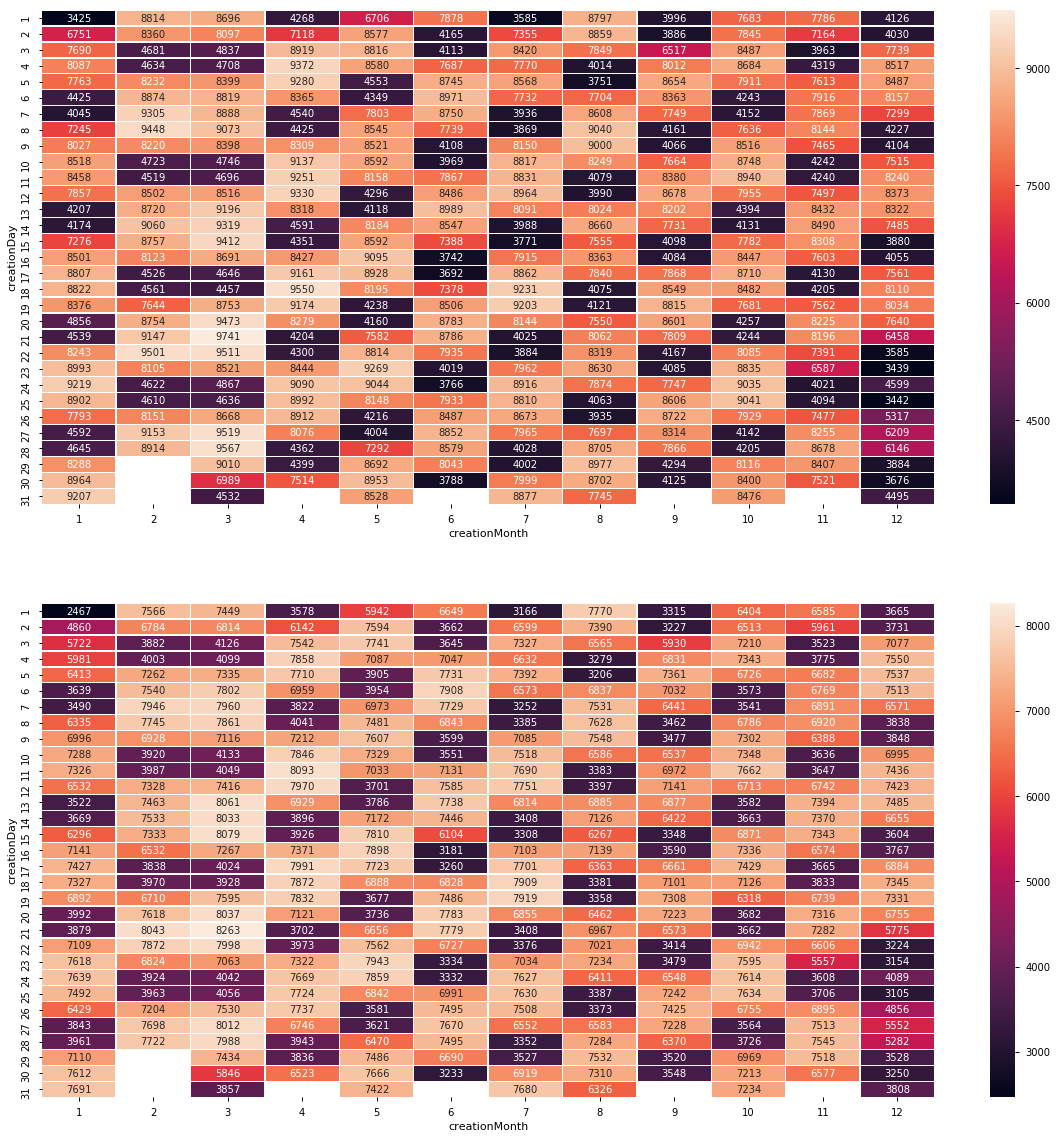

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [9]:
pivoted_questions = daily_activity[daily_activity.isAnswer == 0].pivot('creationDay', 'creationMonth', 'cnt')

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(2, 1, 1)
plt.figure(figsize=(15,10))
sns.heatmap(pivoted_questions, annot=True, fmt='.0f', linewidths=.25, ax=ax1)

pivoted_answers = daily_activity[daily_activity.isAnswer == 1].pivot('creationDay', 'creationMonth', 'cnt')
ax2 = fig.add_subplot(2, 1, 2)
plt.figure(figsize=(15,10))
sns.heatmap(pivoted_answers, annot=True, fmt='.0f', linewidths=.25, ax=ax2)

## Most popular tags in 2018

In this section we will explore usage of tags and try to see which ones are most used, have biggest number of answers etc.

Query: https://data.stackexchange.com/stackoverflow/query/966601/most-popular-tags-in-a-year


In [10]:
tags = pd.read_csv('https://data.stackexchange.com/stackoverflow/csv/1198482')
tags.head(20)

,tag_count,TagName,Id
0,236009,javascript,3
1,230338,python,16
2,167294,java,17
3,130146,android,1386
4,121710,c#,9
5,117317,php,5
6,91693,html,2
7,63699,angular,125866
8,63465,jquery,820
9,61823,css,4


In [11]:
top_20_tag_ids = tags.head(20).Id.values
top_50_tag_ids = tags.head(50).Id.values

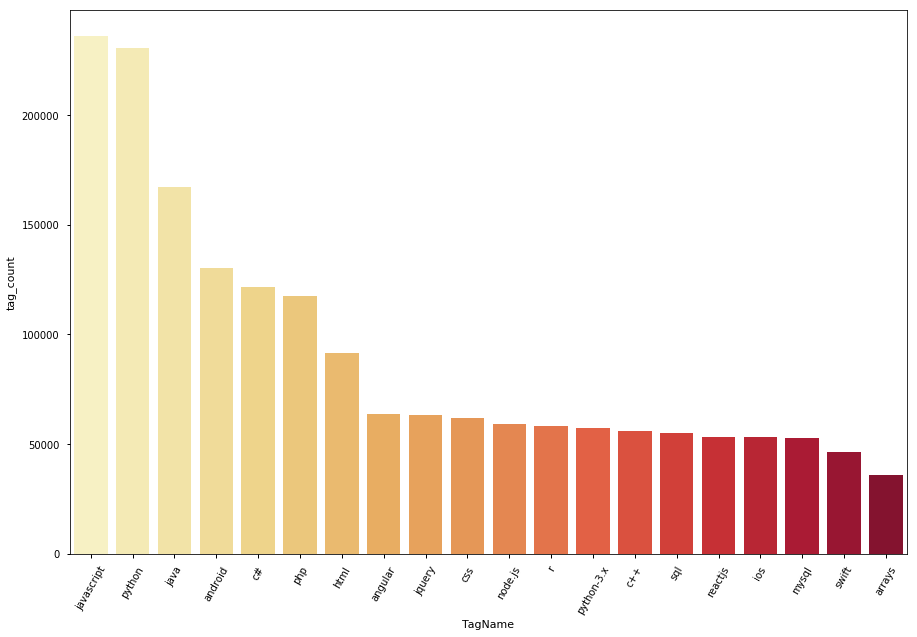

In [36]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
sns.barplot(data=tags[0:20], x='TagName', y='tag_count', palette=colormap)

## View counts, scores and answer count for a tag

Query: https://data.stackexchange.com/stackoverflow/query/966795/stats-per-tag

In [13]:
tag_stats = pd.read_csv('https://data.stackexchange.com/stackoverflow/csv/1198516')
tag_stats.head()

,tag_count,avg_score,sum_answer,avg_answer,sum_comment,avg_comment,sum_favorite,avg_favorite,sum_view_count,avg_view_count,TagName,Id
0,62,0.741935,71,1.145161,169,2.725806,11.0,1.100000,17047,274.951613,database-indexes,52846
1,11,0.181818,8,0.727273,18,1.636364,2.0,0.666667,477,43.363636,database-management,22298
2,103,0.592233,96,0.932039,261,2.533981,14.0,0.875000,17230,167.281553,database-partitioning,37063
3,18,0.055556,14,0.777778,34,1.888889,0.0,0.000000,1398,77.666667,database-relations,7874
4,15,0.400000,12,0.800000,45,3.000000,7.0,1.166667,572,38.133333,database-security,12346


### Top 20 tags with biggest number of answers

In [14]:
tag_stats[tag_stats.Id.isin(top_20_tag_ids)].sort_values('sum_answer', ascending=False)[['sum_answer', 'avg_answer', 'TagName']]

,sum_answer,avg_answer,TagName
25315,279889,1.185925,javascript
5919,257575,1.118248,python
25299,178375,1.066237,java
41273,125538,1.070075,php
12463,123760,1.016843,c#
13403,122643,0.942349,android
23093,118670,1.294210,html
40774,82711,1.503153,sql
32743,81986,1.326141,css
21642,75701,1.192799,jquery


### Top 20 tags with biggest number of views

In [37]:
tag_stats[tag_stats.Id.isin(top_20_tag_ids)].sort_values('avg_view_count', ascending=False)[['sum_view_count', 'avg_view_count', 'TagName']]

,sum_view_count,avg_view_count,TagName
13621,21184880,332.577905,angular
10237,11714718,219.561766,reactjs
13403,23849597,183.252632,android
29433,9910926,166.968665,node.js
21471,8779840,165.149446,ios
5919,34961746,151.784534,python
28264,6864139,148.632346,swift
25299,23599769,141.067635,java
9075,7737903,134.785539,python-3.x
25315,30261365,128.221233,javascript


### Number of answers/Number of views

In [16]:
top_25_tag_stats = tag_stats[tag_stats.Id.isin(tags.head(25).Id.values)].copy()
top_25_tag_stats['answer_view_ratio'] = top_25_tag_stats.sum_view_count/top_25_tag_stats.sum_answer
top_25_tag_stats.sort_values('answer_view_ratio', inplace=True, ascending=False)


top_50_tag_stats = tag_stats[tag_stats.Id.isin(top_50_tag_ids)].copy()
top_50_tag_stats['answer_view_ratio'] = top_50_tag_stats.sum_view_count/top_50_tag_stats.sum_answer
top_50_tag_stats.sort_values('answer_view_ratio', inplace=True, ascending=False)

In [38]:
top_50_tag_stats[['TagName', 'answer_view_ratio', 'sum_answer', 'sum_view_count']].head(20)

,TagName,answer_view_ratio,sum_answer,sum_view_count
32228,tensorflow,334.279393,12724,4253371
13621,angular,312.936762,67697,21184880
5345,docker,293.762318,16459,4835034
12329,react-native,290.229501,19172,5564280
12194,spring-boot,287.833895,20168,5805034
31254,vue.js,277.565725,15831,4394143
31112,typescript,253.034369,31133,7877719
13382,spring,241.230829,21778,5253525
9616,firebase,232.629142,23842,5546344
26899,amazon-web-services,206.081675,16480,3396226


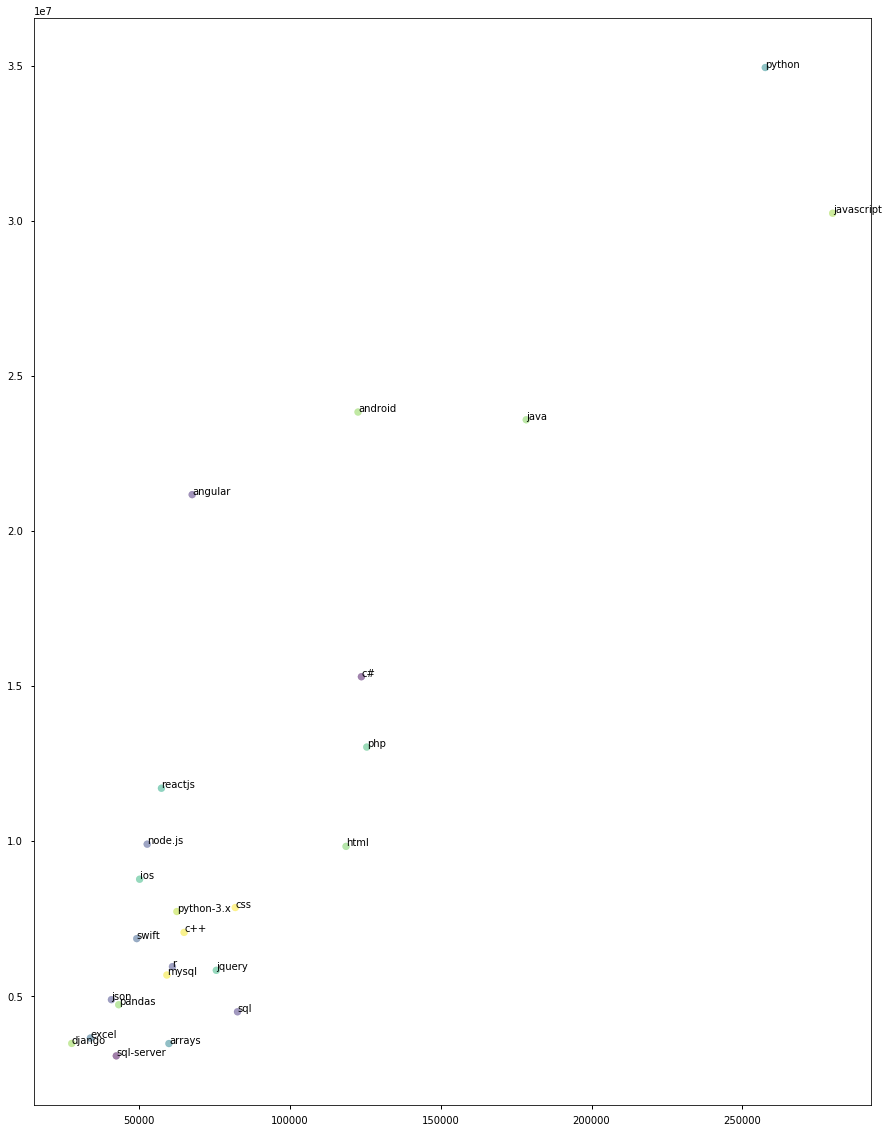

In [18]:
colors = np.random.rand(25)
plt.figure(figsize=(15, 20))

ax = plt.subplot()
ax.scatter(y = top_25_tag_stats.sum_view_count, x = top_25_tag_stats.sum_answer, c=colors, alpha=0.5)

for row in top_25_tag_stats.iterrows():
    ax.annotate(row[1].TagName, (row[1].sum_answer+ 10, row[1].sum_view_count), )

## Ratio of unanswered and answered questions

Query: https://data.stackexchange.com/stackoverflow/query/966855/ratio-of-answered-to-unanswered-questions

In [19]:
ua_ratio = pd.read_csv('https://data.stackexchange.com/stackoverflow/csv/1198583')

In [39]:
ua_ratio.head()

,Tag,TagId,Unanswered,Answered,U/A Ratio
0,jplayer,49925,17,1,17.0
1,intrusion-detection,49695,16,1,16.0
2,cefsharp.offscreen,117908,16,1,16.0
3,svnkit,8855,14,1,14.0
4,ffserver,34123,13,1,13.0


These are tags with low number of questions so UA ratio will always be relatively big. We will look UA ration only for top tags with biggest number of usage.

In [41]:
top_50_tags_ua_ratio = ua_ratio[ua_ratio.TagId.isin(top_50_tag_ids)]
top_50_tags_ua_ratio.head(20)

,Tag,TagId,Unanswered,Answered,U/A Ratio
5456,tensorflow,115813,7479,9635,0.776232
5459,wordpress,382,9310,12006,0.775446
6036,asp.net,96,7439,10409,0.714670
6760,android,1386,44442,68237,0.651289
7170,mongodb,30073,6651,10813,0.615093
7194,angularjs,78022,5767,9415,0.612533
7343,react-native,110853,7808,12969,0.602051
7553,linux,58,5011,8600,0.582674
7607,ios,58338,17467,30202,0.578339
7746,.net,1,5916,10466,0.565259


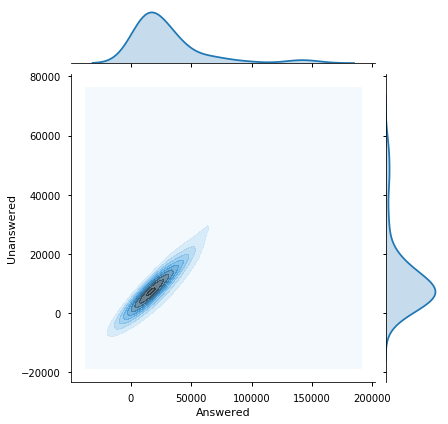

In [47]:
sns.jointplot(data = top_50_tags_ua_ratio, y = 'Unanswered', x = 'Answered', alpha=0.6, kind='kde')

## Weekend vs working days

Query: https://data.stackexchange.com/stackoverflow/query/edit/967074

In [23]:
weekend_data = pd.read_csv('https://data.stackexchange.com/stackoverflow/csv/1198809')
weekend_data.head(10)

,TagName,total,weekend,ratio
0,javascript,236009,42637,0.180658
1,python,230338,44517,0.193268
2,java,167294,30489,0.182248
3,android,130146,26002,0.199791
4,c#,121710,18887,0.155180
5,php,117317,22579,0.192461
6,html,91693,17343,0.189142
7,angular,63699,9079,0.142530
8,jquery,63465,10855,0.171039
9,css,61823,11753,0.190107


/home/zvonimir/anaconda3/envs/stackexchange/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x720 with 0 Axes>

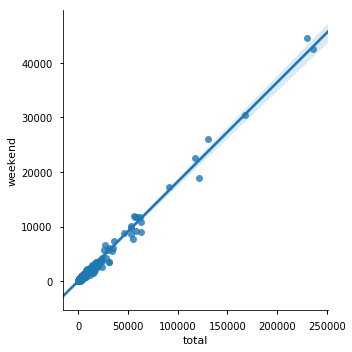

In [24]:
plt.figure(figsize=(15, 10))
sns.lmplot(data=weekend_data, x='total', y='weekend')

In [25]:
weekend_top_100 = weekend_data[0:100].sort_values('ratio', ascending=False)
weekend_top_100.head(20)

,TagName,total,weekend,ratio
91,algorithm,8284,2132,0.257364
82,firebase-realtime-database,8953,2202,0.245951
27,c,27110,6582,0.242789
99,flutter,7919,1810,0.228564
28,firebase,26192,5743,0.219265
76,unity3d,9995,2172,0.217309
78,function,9186,1982,0.215763
85,machine-learning,8488,1815,0.213831
57,android-studio,13631,2890,0.212017
13,c++,56138,11900,0.211978


In [26]:
weekend_data[weekend_data.ratio > 104/365]

,TagName,total,weekend,ratio
563,linked-list,1422,411,0.289030
723,prolog,1091,312,0.285976
913,discord.js,861,271,0.314750
1249,scanf,603,177,0.293532
1292,binary-search-tree,583,168,0.288165
1334,mips,561,164,0.292335
1423,binary-tree,520,151,0.290385
1469,scheme,506,146,0.288538
1522,racket,488,140,0.286885
1828,coq,391,112,0.286445
